<a href="https://colab.research.google.com/github/yuanhaobo0108/zhihu/blob/master/BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Batch normalization for gradient vanishing**

In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./mnist', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./mnist', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


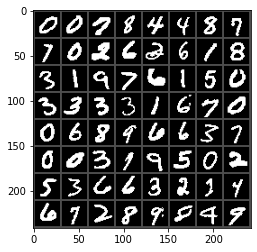

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 0.1307 + 0.3081     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 25 output channels, 5x5 square convolution kernel, (2, 2) stride
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        # 25 input image channel, 64 output channels, 5x5 square convolution kernel, (1, 1) stride, 2 padding
        self.conv2 = nn.Conv2d(25, 64, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024, 64)
        self.dp  = nn.Dropout(p=0)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))  
        x = self.dp(x)
        x = self.fc2(x)
        x = F.log_softmax(x, 1)
        return x

net = Net()


WithoutBN+0.001LR

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss1 = []
acc1=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss /50))
            
            loss1.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc1.append(100 * correct / total)  
print('Finished Training')


[1,    50] loss: 2.289
Accuracy of the network on the 10000 test images: 23.750000 %
[1,   100] loss: 2.205
Accuracy of the network on the 10000 test images: 42.320000 %
[1,   150] loss: 2.017
Accuracy of the network on the 10000 test images: 75.960000 %
[1,   200] loss: 1.481
Accuracy of the network on the 10000 test images: 77.280000 %
[1,   250] loss: 0.856
Accuracy of the network on the 10000 test images: 82.930000 %
[1,   300] loss: 0.611
Accuracy of the network on the 10000 test images: 85.640000 %
[1,   350] loss: 0.493
Accuracy of the network on the 10000 test images: 86.700000 %
[1,   400] loss: 0.451
Accuracy of the network on the 10000 test images: 87.830000 %
[1,   450] loss: 0.438
Accuracy of the network on the 10000 test images: 87.500000 %
[1,   500] loss: 0.420
Accuracy of the network on the 10000 test images: 89.880000 %
[1,   550] loss: 0.388
Accuracy of the network on the 10000 test images: 89.050000 %
[1,   600] loss: 0.337
Accuracy of the network on the 10000 test 

WithoutBN+0.01LR

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 25 output channels, 5x5 square convolution kernel, (2, 2) stride
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        # 25 input image channel, 64 output channels, 5x5 square convolution kernel, (1, 1) stride, 2 padding
        self.conv2 = nn.Conv2d(25, 64, 5, padding=2)
        self.bnorm1 = nn.BatchNorm2d(25)
        self.bnorm2 = nn.BatchNorm2d(64)
        self.bnorm3 = nn.BatchNorm1d(1024)
        self.bnorm4 = nn.BatchNorm1d(10)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024, 64)
        self.dp  = nn.Dropout(p=0)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bnorm1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bnorm2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x,1)
        x = self.bnorm3(x)
        x = F.relu(self.fc1(x))   #F.sigmoid
        x = self.dp(x)
        x = self.fc2(x)
        x = self.bnorm4(x)
        x = F.log_softmax(x, 1)
        return x

net = Net()

WithBN+0.001LR

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss3 = []
acc3=[]
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss3.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc3.append(100 * correct / total)  
print('Finished Training')


[1,    50] loss: 1.179
Accuracy of the network on the 10000 test images: 88.220000 %
[1,   100] loss: 0.703
Accuracy of the network on the 10000 test images: 91.690000 %
[1,   150] loss: 0.598
Accuracy of the network on the 10000 test images: 93.220000 %
[1,   200] loss: 0.542
Accuracy of the network on the 10000 test images: 94.220000 %
[1,   250] loss: 0.505
Accuracy of the network on the 10000 test images: 94.800000 %
[1,   300] loss: 0.468
Accuracy of the network on the 10000 test images: 95.180000 %
[1,   350] loss: 0.417
Accuracy of the network on the 10000 test images: 95.680000 %
[1,   400] loss: 0.406
Accuracy of the network on the 10000 test images: 95.880000 %
[1,   450] loss: 0.376
Accuracy of the network on the 10000 test images: 96.310000 %
[1,   500] loss: 0.348
Accuracy of the network on the 10000 test images: 96.380000 %
[1,   550] loss: 0.339
Accuracy of the network on the 10000 test images: 96.580000 %
[1,   600] loss: 0.326
Accuracy of the network on the 10000 test 

WithBN+0.01LR

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
loss4 = []
acc4=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss4.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc4.append(100 * correct / total)  
print('Finished Training')


[1,    50] loss: 0.777
Accuracy of the network on the 10000 test images: 93.800000 %
[1,   100] loss: 0.381
Accuracy of the network on the 10000 test images: 95.880000 %
[1,   150] loss: 0.258
Accuracy of the network on the 10000 test images: 96.480000 %
[1,   200] loss: 0.214
Accuracy of the network on the 10000 test images: 96.860000 %
[1,   250] loss: 0.180
Accuracy of the network on the 10000 test images: 96.930000 %
[1,   300] loss: 0.180
Accuracy of the network on the 10000 test images: 97.420000 %
[1,   350] loss: 0.153
Accuracy of the network on the 10000 test images: 97.600000 %
[1,   400] loss: 0.143
Accuracy of the network on the 10000 test images: 97.800000 %
[1,   450] loss: 0.139
Accuracy of the network on the 10000 test images: 98.010000 %
[1,   500] loss: 0.119
Accuracy of the network on the 10000 test images: 97.760000 %
[1,   550] loss: 0.127
Accuracy of the network on the 10000 test images: 97.620000 %
[1,   600] loss: 0.124
Accuracy of the network on the 10000 test 

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
loss2 = []
acc2=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss2.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc2.append(100 * correct / total)  
print('Finished Training')


[1,    50] loss: 0.550
Accuracy of the network on the 10000 test images: 94.430000 %
[1,   100] loss: 0.209
Accuracy of the network on the 10000 test images: 96.090000 %
[1,   150] loss: 0.159
Accuracy of the network on the 10000 test images: 96.770000 %
[1,   200] loss: 0.147
Accuracy of the network on the 10000 test images: 96.790000 %
[1,   250] loss: 0.132
Accuracy of the network on the 10000 test images: 96.940000 %
[1,   300] loss: 0.126
Accuracy of the network on the 10000 test images: 97.390000 %
[1,   350] loss: 0.111
Accuracy of the network on the 10000 test images: 97.500000 %
[1,   400] loss: 0.100
Accuracy of the network on the 10000 test images: 97.620000 %
[1,   450] loss: 0.084
Accuracy of the network on the 10000 test images: 97.790000 %
[1,   500] loss: 0.085
Accuracy of the network on the 10000 test images: 97.650000 %
[1,   550] loss: 0.082
Accuracy of the network on the 10000 test images: 98.000000 %
[1,   600] loss: 0.091
Accuracy of the network on the 10000 test 

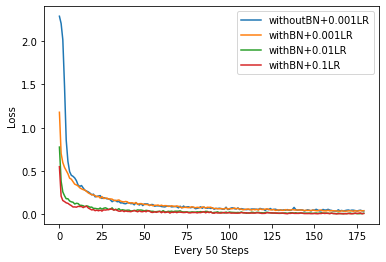

In [ ]:
plt.plot(loss1,  label = "withoutBN+0.001LR")
plt.plot(loss3,  label = "withBN+0.001LR")
plt.plot(loss4,  label = "withBN+0.01LR")
plt.plot(loss2,  label = "withBN+0.1LR")
plt.xlabel('Every 50 Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

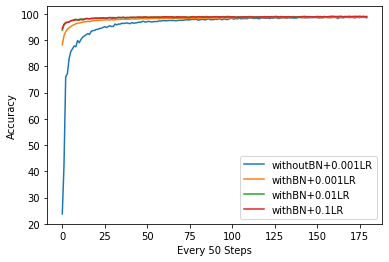

In [ ]:
plt.plot(acc1,  label = "withoutBN+0.001LR")
plt.plot(acc3,  label = "withBN+0.001LR")
plt.plot(acc4,  label = "withBN+0.01LR")
plt.plot(acc2,  label = "withBN+0.1LR")
plt.xlabel('Every 50 Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

DP=0.2


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 25 output channels, 5x5 square convolution kernel, (2, 2) stride
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        # 25 input image channel, 64 output channels, 5x5 square convolution kernel, (1, 1) stride, 2 padding
        self.conv2 = nn.Conv2d(25, 64, 5, padding=2)
        self.bnorm1 = nn.BatchNorm2d(25)
        self.bnorm2 = nn.BatchNorm2d(64)
        self.bnorm3 = nn.BatchNorm1d(1024)
        self.bnorm4 = nn.BatchNorm1d(10)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024, 64)
        self.dp  = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bnorm1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bnorm2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x,1)
        x = self.bnorm3(x)
        x = F.relu(self.fc1(x))   #F.sigmoid
        x = self.dp(x)
        x = self.fc2(x)
        x = self.bnorm4(x)
        x = F.log_softmax(x, 1)
        return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
loss5 = []
acc5=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss5.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc5.append(100 * correct / total)  
print('Finished Training')

[1,    50] loss: 0.855
Accuracy of the network on the 10000 test images: 92.010000 %
[1,   100] loss: 0.440
Accuracy of the network on the 10000 test images: 93.970000 %
[1,   150] loss: 0.326
Accuracy of the network on the 10000 test images: 95.640000 %
[1,   200] loss: 0.270
Accuracy of the network on the 10000 test images: 96.320000 %
[1,   250] loss: 0.218
Accuracy of the network on the 10000 test images: 96.350000 %
[1,   300] loss: 0.203
Accuracy of the network on the 10000 test images: 96.670000 %
[1,   350] loss: 0.188
Accuracy of the network on the 10000 test images: 97.170000 %
[1,   400] loss: 0.178
Accuracy of the network on the 10000 test images: 96.930000 %
[1,   450] loss: 0.154
Accuracy of the network on the 10000 test images: 97.140000 %
[1,   500] loss: 0.160
Accuracy of the network on the 10000 test images: 97.390000 %
[1,   550] loss: 0.157
Accuracy of the network on the 10000 test images: 97.510000 %
[1,   600] loss: 0.129
Accuracy of the network on the 10000 test 

In [ ]:
Dp=0.5

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 25 output channels, 5x5 square convolution kernel, (2, 2) stride
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        # 25 input image channel, 64 output channels, 5x5 square convolution kernel, (1, 1) stride, 2 padding
        self.conv2 = nn.Conv2d(25, 64, 5, padding=2)
        self.bnorm1 = nn.BatchNorm2d(25)
        self.bnorm2 = nn.BatchNorm2d(64)
        self.bnorm3 = nn.BatchNorm1d(1024)
        self.bnorm4 = nn.BatchNorm1d(10)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024, 64)
        self.dp  = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bnorm1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bnorm2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x,1)
        x = self.bnorm3(x)
        x = F.relu(self.fc1(x))   #F.sigmoid
        x = self.dp(x)
        x = self.fc2(x)
        x = self.bnorm4(x)
        x = F.log_softmax(x, 1)
        return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
loss6 = []
acc6=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss6.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc6.append(100 * correct / total)  
print('Finished Training')

[1,    50] loss: 1.101
Accuracy of the network on the 10000 test images: 86.350000 %
[1,   100] loss: 0.642
Accuracy of the network on the 10000 test images: 90.640000 %
[1,   150] loss: 0.490
Accuracy of the network on the 10000 test images: 92.970000 %
[1,   200] loss: 0.405
Accuracy of the network on the 10000 test images: 93.970000 %
[1,   250] loss: 0.348
Accuracy of the network on the 10000 test images: 94.480000 %
[1,   300] loss: 0.310
Accuracy of the network on the 10000 test images: 95.180000 %
[1,   350] loss: 0.289
Accuracy of the network on the 10000 test images: 95.250000 %
[1,   400] loss: 0.259
Accuracy of the network on the 10000 test images: 95.370000 %
[1,   450] loss: 0.246
Accuracy of the network on the 10000 test images: 95.740000 %
[1,   500] loss: 0.246
Accuracy of the network on the 10000 test images: 96.180000 %
[1,   550] loss: 0.226
Accuracy of the network on the 10000 test images: 96.190000 %
[1,   600] loss: 0.218
Accuracy of the network on the 10000 test 

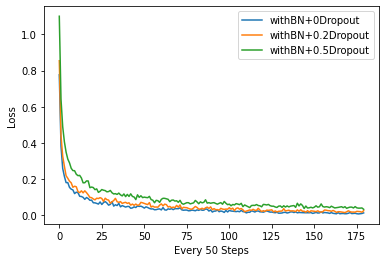

In [ ]:
plt.plot(loss4,  label = "withBN+0Dropout")
plt.plot(loss5,  label = "withBN+0.2Dropout")
plt.plot(loss6,  label = "withBN+0.5Dropout")
plt.xlabel('Every 50 Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

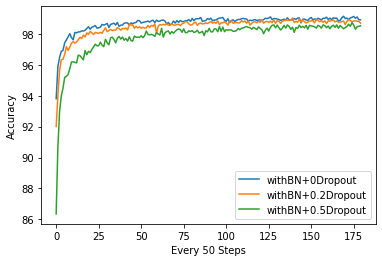

In [ ]:
plt.plot(acc4,  label = "withBN+0Dropout")
plt.plot(acc5,  label = "withBN+0.2Dropout")
plt.plot(acc6,  label = "withBN+0.5Dropout")
plt.xlabel('Every 50 Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

BN after activation function

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 input image channel, 25 output channels, 5x5 square convolution kernel, (2, 2) stride
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2)
        # 25 input image channel, 64 output channels, 5x5 square convolution kernel, (1, 1) stride, 2 padding
        self.conv2 = nn.Conv2d(25, 64, 5, padding=2)
        self.bnorm1 = nn.BatchNorm2d(25)
        self.bnorm2 = nn.BatchNorm2d(64)
        self.bnorm3 = nn.BatchNorm1d(64)
        self.bnorm4 = nn.BatchNorm1d(10)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024, 64)
        self.dp  = nn.Dropout(p=0)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bnorm1(x)
        x = self.conv2(x)
        x = F.relu(x)  
        x = self.bnorm2(x)
        x = self.pool(x)

        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x)) 
        x = self.bnorm3(x)  #F.sigmoid
        x = self.dp(x)
        x = self.fc2(x)
        x = F.log_softmax(x, 1)
        x = self.bnorm4(x)
        return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
loss7 = []
acc7=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            loss7.append(running_loss / 50)

            running_loss = 0.0
            correct = 0
            total = 0
            #acc1=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    # calculate outputs by running images through the network
                    outputs = net(images)
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))
            acc7.append(100 * correct / total)  
print('Finished Training')

[1,    50] loss: 0.235
Accuracy of the network on the 10000 test images: 96.570000 %
[1,   100] loss: 0.197
Accuracy of the network on the 10000 test images: 97.180000 %
[1,   150] loss: 0.192
Accuracy of the network on the 10000 test images: 97.150000 %
[1,   200] loss: 0.161
Accuracy of the network on the 10000 test images: 97.340000 %
[1,   250] loss: 0.157
Accuracy of the network on the 10000 test images: 97.530000 %
[1,   300] loss: 0.144
Accuracy of the network on the 10000 test images: 97.700000 %
[1,   350] loss: 0.151
Accuracy of the network on the 10000 test images: 97.700000 %
[1,   400] loss: 0.127
Accuracy of the network on the 10000 test images: 97.940000 %
[1,   450] loss: 0.112
Accuracy of the network on the 10000 test images: 97.920000 %
[1,   500] loss: 0.110
Accuracy of the network on the 10000 test images: 97.950000 %
[1,   550] loss: 0.109
Accuracy of the network on the 10000 test images: 98.240000 %
[1,   600] loss: 0.117
Accuracy of the network on the 10000 test 

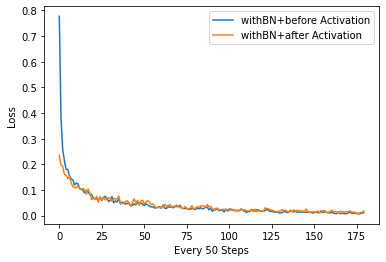

In [ ]:
plt.plot(loss4,  label = "withBN+before Activation")
plt.plot(loss7,  label = "withBN+after Activation")
plt.xlabel('Every 50 Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

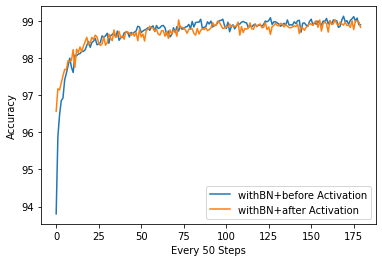

In [ ]:
plt.plot(acc4,  label = "withBN+before Activation")
plt.plot(acc7,  label = "withBN+after Activation")
plt.xlabel('Every 50 Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()